<a href="https://colab.research.google.com/github/Satish-970/Bitcoin-price/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Adding a connection to google drive for accessing dataset would be easy every time`

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`giving path of folder that has our dataset`





In [16]:
path='drive/My Drive/Colab Notebooks'

`Importing all libraries that wil requiring for our project`



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
# Load the dataset
df = pd.read_csv(path+'/BTC-2021min.csv')
del df['symbol']
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


         unix                 date      open      high       low     close  \
0  1646106180  2022-03-01 03:43:00  43046.58  43046.58  43046.58  43046.58   
1  1646106060  2022-03-01 03:41:00  43018.23  43046.59  43018.23  43046.58   
2  1646106000  2022-03-01 03:40:00  43022.24  43022.24  43016.03  43016.03   
3  1646105940  2022-03-01 03:39:00  43035.16  43035.16  42999.44  42999.44   
4  1646105880  2022-03-01 03:38:00  43077.82  43077.82  43049.46  43049.46   

   Volume BTC    Volume USD  
0    0.000000      0.000000  
1    0.142977   6154.673021  
2    0.009230    397.037957  
3    0.820950  35300.390268  
4    0.022210    956.143143  
unix          0
date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64
               unix           open           high            low  \
count  6.107820e+05  610782.000000  610782.000000  610782.000000   
mean   1.627783e+09   46482.265381   46509.783597   46454.085712   
std   

In [28]:
print(df.columns) #analyzing the columns present


Index(['unix', 'date', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')


In [29]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Setting 'date' as the index for time series analysis
df.set_index('date', inplace=True)

# Selecting features and target variable
X = df[['open', 'high', 'low']]  # Independent variables
y = df['close']  # Dependent variable

print(df.head())  # Verifying the changes


                           unix      open      high       low     close  \
date                                                                      
2022-03-01 03:43:00  1646106180  43046.58  43046.58  43046.58  43046.58   
2022-03-01 03:41:00  1646106060  43018.23  43046.59  43018.23  43046.58   
2022-03-01 03:40:00  1646106000  43022.24  43022.24  43016.03  43016.03   
2022-03-01 03:39:00  1646105940  43035.16  43035.16  42999.44  42999.44   
2022-03-01 03:38:00  1646105880  43077.82  43077.82  43049.46  43049.46   

                     Volume BTC    Volume USD  
date                                           
2022-03-01 03:43:00    0.000000      0.000000  
2022-03-01 03:41:00    0.142977   6154.673021  
2022-03-01 03:40:00    0.009230    397.037957  
2022-03-01 03:39:00    0.820950  35300.390268  
2022-03-01 03:38:00    0.022210    956.143143  


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes to confirm
print(X_train.shape, X_test.shape)


(488625, 3) (122157, 3)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(X_test) # storing predicted values of x_test


`evaluating the accuracy of our Bitcoin price prediction model using three common error metrics:`

In [42]:
mae = mean_absolute_error(y_test, y_pred)#Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)#Mean Squared Error (MSE)
rmse = np.sqrt(mse)#Root Mean Squared Error (RMSE)

print(f"Mean Absolute Error: {mae}")#Lower is better—this suggests very accurate predictions.
print(f"Mean Squared Error: {mse}")# useful for comparing models.
print(f"Root Mean Squared Error: {rmse}")#Lower RMSE = Better model performance.


Mean Absolute Error: 14.780802105215994
Mean Squared Error: 573.6422641092533
Root Mean Squared Error: 23.95083013403196


```These visualizations help us to analyze how well the Linear Regression model predicts Bitcoin prices and provide insights into price trends.```

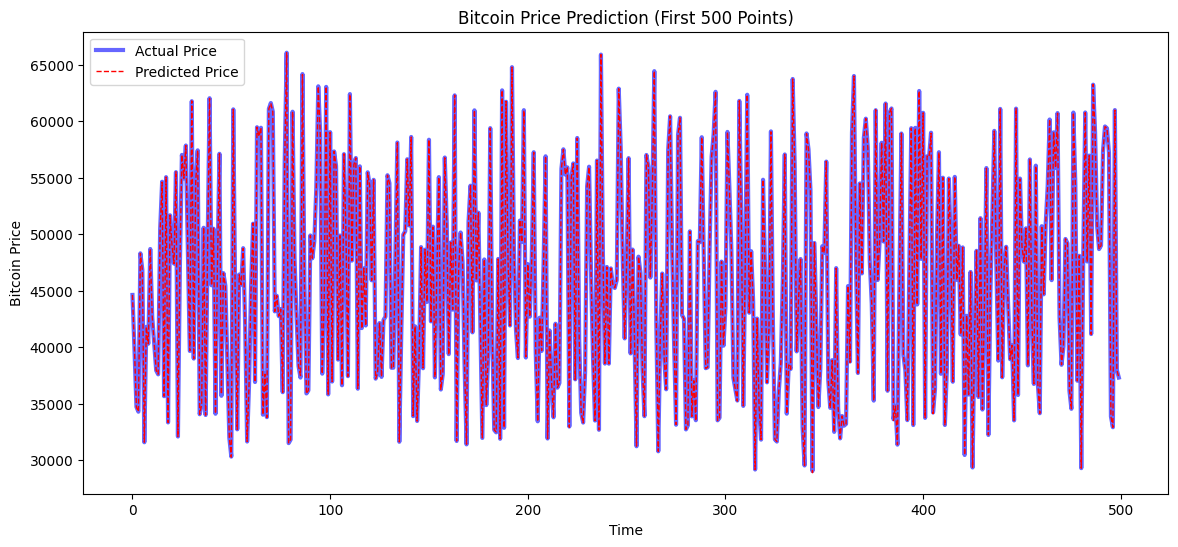

In [68]:
#"Time Series Line Plot of Bitcoin Price: Actual vs Predicted"
plt.figure(figsize=(14,6))
plt.plot(y_test.values[:500], label="Actual Price", color='blue', linewidth=3,alpha=0.6)   # Keep actual as solid blue
plt.plot(y_pred[:500], label="Predicted Price", color='red', linewidth=1, linestyle="dashed") #Keep prediction as dashed red for better visualization
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.title("Bitcoin Price Prediction (First 500 Points)")# only 500 for better visualization
plt.show()


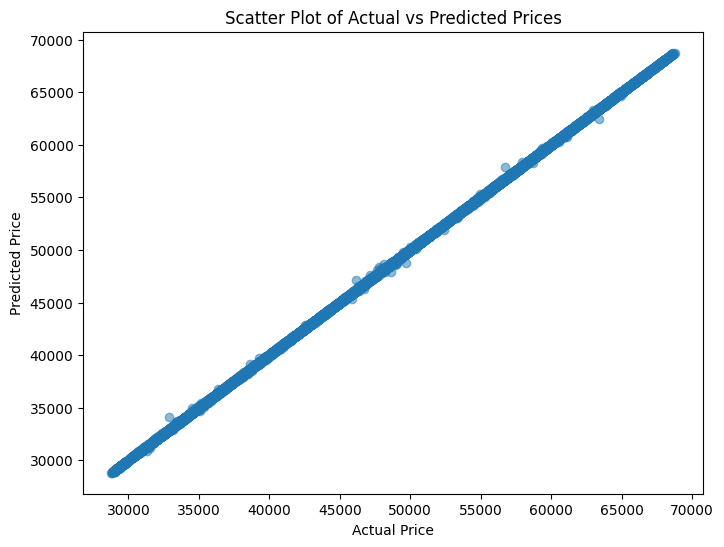

In [35]:
# Scatter Plot (Actual vs. Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Scatter Plot of Actual vs Predicted Prices")
plt.show()


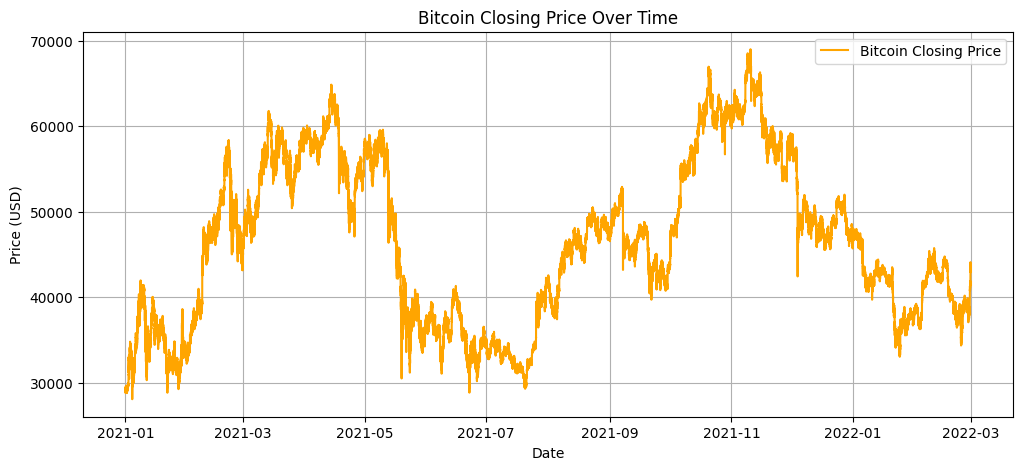

In [37]:
#Time Series Line Plot of Bitcoin Closing Price
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['close'], label="Bitcoin Closing Price", color="orange")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


`Example: Predict close price for a new data point`

In [40]:
# Create a DataFrame with column names matching the training data
new_data = pd.DataFrame([[45000, 46000, 44000]], columns=['open', 'high', 'low'])

# Make the prediction
predicted_close = model.predict(new_data)
print(f"Predicted Close Price: ${predicted_close[0]:.2f}")#result


Predicted Close Price: $45044.04
